# Logistic Regression Model with Treatment of Imbalanced Data

## Load the dataset

In [1]:
# Import the pandas, numpy packages and dump from joblib
import pandas as pd
import numpy as np
from joblib import dump

In [2]:
# Load the saved sets from data/processed using numpy
X_train = np.load('../data/processed/X_train.npy')
X_val   = np.load('../data/processed/X_val.npy'  )
y_train = np.load('../data/processed/y_train.npy')
y_val   = np.load('../data/processed/y_val.npy'  )

## Train Logistic Regression Model

In [3]:
# Import the LogisticRegression from sklearn.ensemble
from sklearn.linear_model import LogisticRegression

In [4]:
# Instantiate the LogisticRegression class called logreg
logreg = LogisticRegression()
# solver='saga',max_iter=500,C=10,class_weight='balanced',class_weight='balanced'

In [5]:
# Fit the Logistic model
logreg.fit(X_train, y_train)

LogisticRegression()

In [6]:
# Display the default parameter
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [7]:
from joblib import dump 

dump(logreg,  '../models/logreg_default.joblib')

['../models/logreg_default.joblib']

In [8]:
# Calculate the probability when target=1
probs_train=logreg.predict_proba(X_train)[:,1]
probs_val=logreg.predict_proba(X_val)[:,1]

In [9]:
# Import the function print_class_perf from models.performance and display the ROC-AUC score
import sys
sys.path.insert(1, '..')
from src.models.performance import print_class_perf

print_class_perf(y_actuals=y_train, y_probs=probs_train,set_name='Training')
print_class_perf(y_actuals=y_val, y_probs=probs_val,set_name='Validation')

ROC AUC Score Training: 0.7002227541362216
ROC AUC Score Validation: 0.7263480982185845


### Confusion Matrix

In [10]:
# Display the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [11]:
# Predict the target value for training and validation sets
pred_train=logreg.predict(X_train)
pred_val=logreg.predict(X_val)
# Print the confusion matrix for train and validation sets
print(confusion_matrix(y_val, pred_val))

[[   3  245]
 [   9 1331]]


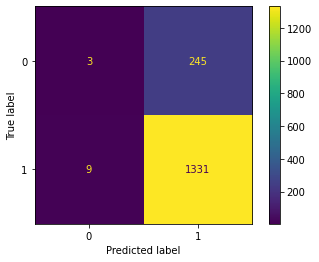

In [54]:
# Display the confusion matrix plot
import warnings
warnings.filterwarnings("ignore")
plot_confusion_matrix(logreg,X_val,y_val)
plt.show()

## Treat Imbalanced Data

### Method 1: SMOTE

In [13]:
# Import SMOTE from imblearn.over_sampling and instantiate the SMOTE class called sm
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

In [14]:
# Convert to balanced training set
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [15]:
# Import the LogisticRegression from sklearn.ensemble
from sklearn.linear_model import LogisticRegression

In [18]:
# Instantiate the LogisticRegression class called logreg
logreg1 = LogisticRegression(max_iter=500)

In [19]:
# Fit the Logistic model
logreg1.fit(X_train_res, y_train_res)

LogisticRegression(max_iter=500)

In [22]:
logreg1.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 500,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

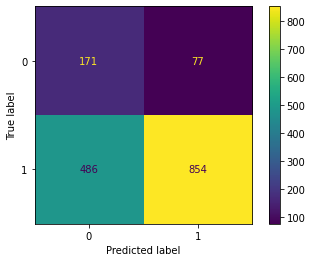

In [48]:
# Display the confusion matrix plot
plot_confusion_matrix(logreg1,X_val,y_val)
plt.show()

In [24]:
# Calculate the probability when target=1
probs_train_res=logreg1.predict_proba(X_train_res)[:,1]
probs_val=logreg1.predict_proba(X_val)[:,1]

In [25]:
# Import the function print_class_perf from models.performance and display the ROC-AUC score
import sys
sys.path.insert(1, '..')
from src.models.performance import print_class_perf

print_class_perf(y_actuals=y_train_res, y_probs=probs_train_res,set_name='Training')
print_class_perf(y_actuals=y_val, y_probs=probs_val,set_name='Validation')

ROC AUC Score Training: 0.7049264887745446
ROC AUC Score Validation: 0.7264955464612421


### Method 2: Undersampling - Tomek Links

In [27]:
# Import TomekLinks from imblearn.under_sampling and intantiate a TomekLinks Class
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()

In [29]:
# Undersample the train set
X_train_tl, y_train_tl = tl.fit_resample(X_train, y_train)

In [34]:
# Instantiate the LogisticRegression class called logreg
logreg2 = LogisticRegression()

In [35]:
# Fit the Logistic model
logreg2.fit(X_train_tl, y_train_tl)

LogisticRegression()

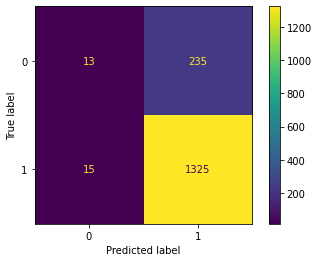

In [47]:
# Display the confusion matrix plot
plot_confusion_matrix(logreg2,X_val,y_val)
plt.show()

In [39]:
# Calculate the probability when target=1
probs_train_res=logreg2.predict_proba(X_train_res)[:,1]
probs_val=logreg2.predict_proba(X_val)[:,1]

In [40]:
# Import the function print_class_perf from models.performance and display the ROC-AUC score
import sys
sys.path.insert(1, '..')
from src.models.performance import print_class_perf

print_class_perf(y_actuals=y_train_res, y_probs=probs_train_res,set_name='Training')
print_class_perf(y_actuals=y_val, y_probs=probs_val,set_name='Validation')

ROC AUC Score Training: 0.7043504315430051
ROC AUC Score Validation: 0.7262126865671643


### Method 3: Set Hyperparameter class_weight='balanced'

In [41]:
# Instantiate the LogisticRegression class called logreg
logreg3 = LogisticRegression(class_weight='balanced')

In [42]:
# Fit the Logistic model
logreg3.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

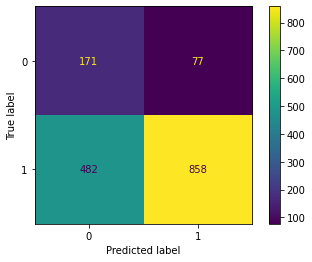

In [46]:
# Display the confusion matrix plot
plot_confusion_matrix(logreg3,X_val,y_val)
plt.show()

In [44]:
# Calculate the probability when target=1
probs_train_res=logreg3.predict_proba(X_train_res)[:,1]
probs_val=logreg3.predict_proba(X_val)[:,1]

In [45]:
# Import the function print_class_perf from models.performance and display the ROC-AUC score
import sys
sys.path.insert(1, '..')
from src.models.performance import print_class_perf

print_class_perf(y_actuals=y_train_res, y_probs=probs_train_res,set_name='Training')
print_class_perf(y_actuals=y_val, y_probs=probs_val,set_name='Validation')

ROC AUC Score Training: 0.7042689699940611
ROC AUC Score Validation: 0.7259418632643236


## Load and clean the test dataset

In [160]:
# Load the pandas and numpy packages
import pandas as pd
import numpy as np

In [161]:
# Import csv file of test data and save into data_test
data_test=pd.read_csv('../data/raw/2022_test.csv')

In [162]:
# Create a copy of data_test and save it into a variable data_test_cleaned
data_test_cleaned=data_test.copy()

In [163]:
# Remove the columns of id, 3P Made, 3PA, 3P% and BLK
data_test_cleaned.drop(['Id','3P Made','3PA','3P%','BLK'],axis=1,inplace=True)

In [164]:
# Add the columns 'TOTAL_MIN','TOTAL_PTS' and 'FG/FT'
data_test_cleaned['TOTAL_MIN']=data_test_cleaned['MIN'] * data_test_cleaned['GP']
data_test_cleaned['TOTAL_PTS']=data_test_cleaned['PTS'] * data_test_cleaned['GP']
data_test_cleaned['FG/FT']=data_test_cleaned['FG%']/data_test_cleaned['FT%']


In [165]:
#  Import StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

In [166]:
# Instantiate the StandardScaler
scaler=StandardScaler()

In [167]:
# Fit and apply the scaling on data_test_cleaned
data_test_cleaned=scaler.fit_transform(data_test_cleaned)

In [168]:
# Create the variable X_test
X_test=data_test_cleaned

## Predict probabilities of target for test data

In [169]:
# Calculate the probabilities for test datasets
probs_test=logreg2.predict_proba(X_test)[:,1]

In [170]:
# Join the probs_test column into data_test
data_test['TARGET_5Yrs']=probs_test

In [40]:
# Export the csv file 'rf_submission_091122.csv' for Kaggle submission
output=data_test[['Id','TARGET_5Yrs']]
output.to_csv('../logistic_submission_211122.csv',index=False)